In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt

In [31]:
airlines=pd.read_excel("Airlines+Data.xlsx",header=0,parse_dates=True)
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [32]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [33]:
airlines.shape

(96, 2)

In [34]:
airlines.set_index("Month",inplace=True)

In [35]:
airlines.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [36]:
airlines[airlines.duplicated()].shape

(16, 1)

In [37]:
airlines[airlines.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [38]:
airlines.drop_duplicates(inplace=True)

In [39]:
airlines.tail()

,Passengers
Month,
2002-07-01,413
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271


In [40]:
airlines.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1996,
            1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997,
            1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
            2002, 2002, 2002],
           dtype='int64', name='Month')

In [41]:
df=airlines.copy()
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


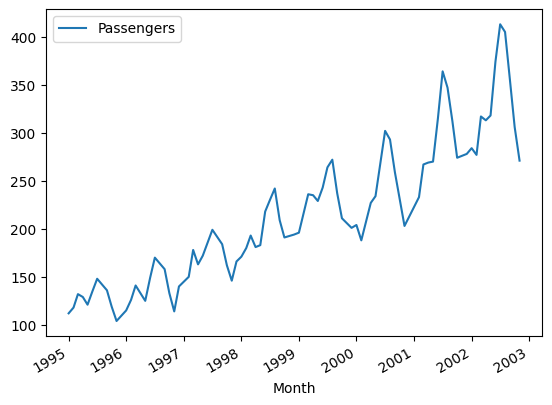

In [42]:
df.plot()
plt.show()

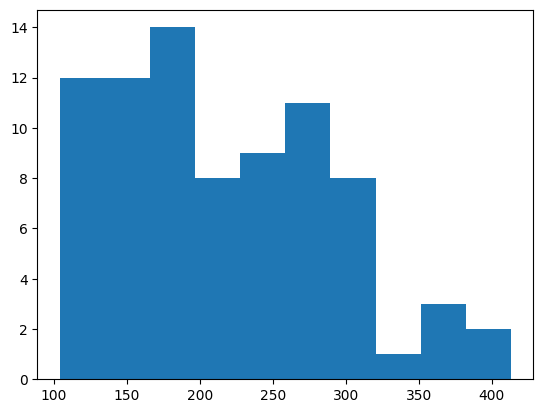

In [43]:
plt.hist(df)
plt.show()

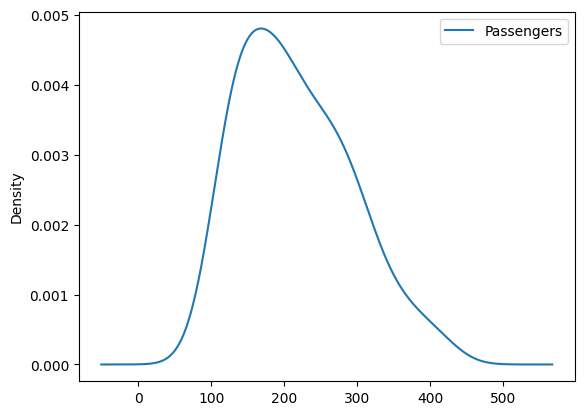

In [44]:
df.plot(kind="kde")
plt.show()

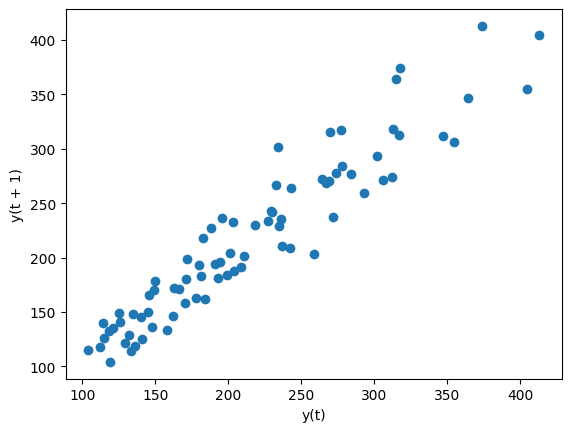

In [47]:
lag_plot(df)
plt.show()

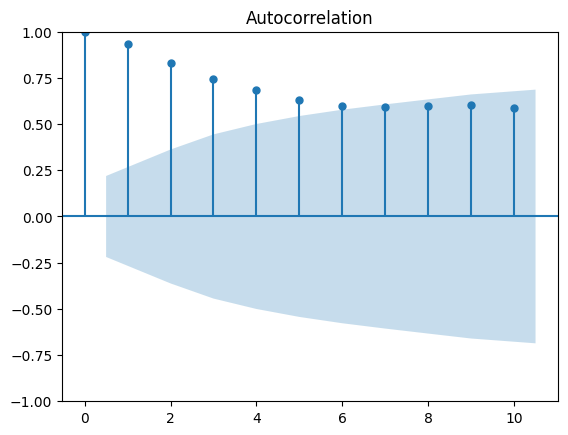

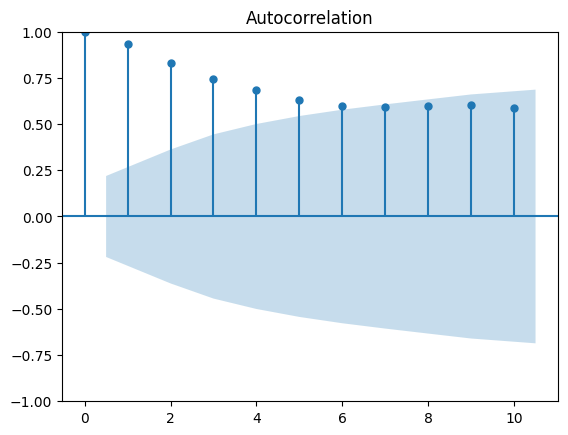

In [49]:
plot_acf(df,lags=10)

In [50]:
#Upsampling
upsample=df.resample("M").mean()
upsample.head()

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0


In [51]:
#Interpolation
interpolated=upsample.interpolate(method="linear")
interpolated.head()

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0


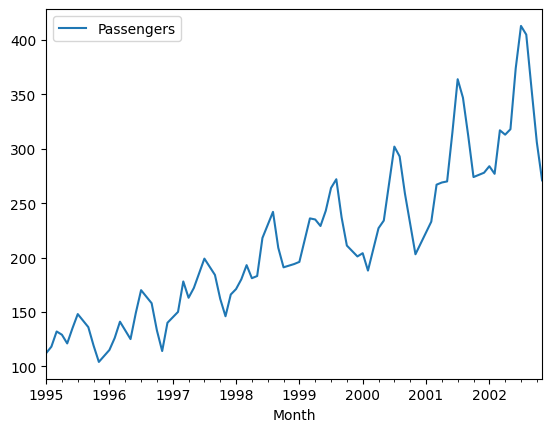

In [52]:
interpolated.plot()
plt.show()

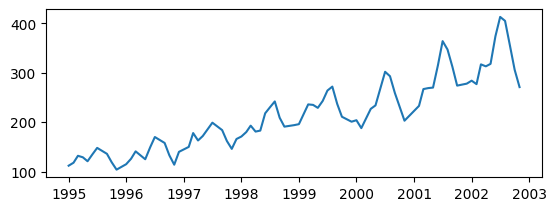

In [54]:
#Transformations
plt.subplot(211)
plt.plot(df)
plt.show()

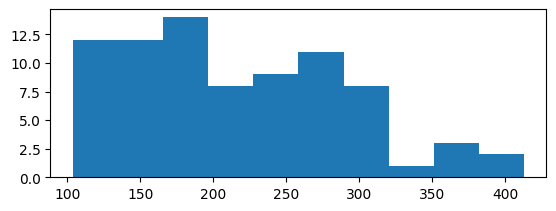

In [56]:
plt.subplot(212)
plt.hist(df)
plt.show()

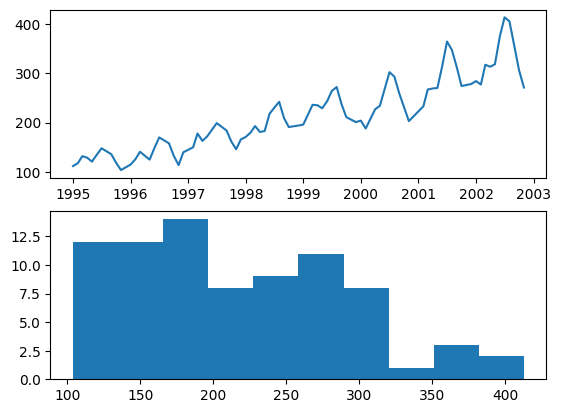

In [57]:
#Square Root Transformation
dataframe=pd.DataFrame(df.values)
dataframe.columns=["Passengers"]
dataframe["Passengers"]=np.sqrt(dataframe["Passengers"])

plt.subplot(211)
plt.plot(df["Passengers"])

plt.subplot(212)
plt.hist(df["Passengers"])
plt.show()

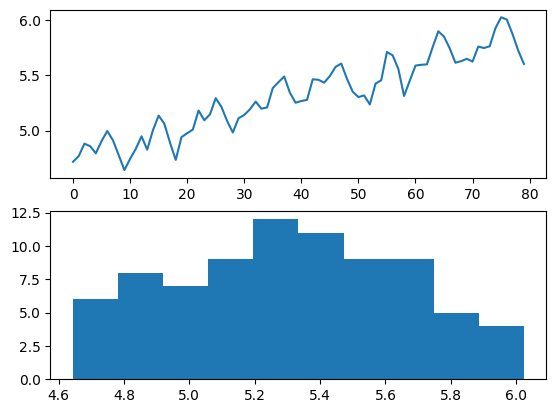

In [60]:
#Log Transformations
#Square Root Transformation
dataframe=pd.DataFrame(df.values)
dataframe.columns=["Passengers"]
dataframe["Passengers"]=np.log(dataframe["Passengers"])

plt.subplot(211)
plt.plot(dataframe["Passengers"])

plt.subplot(212)
plt.hist(dataframe["Passengers"])
plt.show()

In [61]:
Train=interpolated.head(81)
Test=interpolated.tail(14)

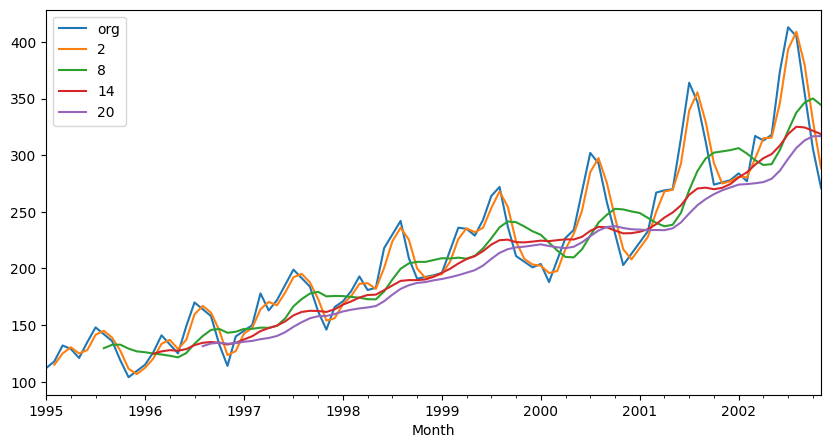

In [65]:
#Moving Average
plt.figure(figsize=(10,5))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
  interpolated.Passengers.rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")
plt.show()

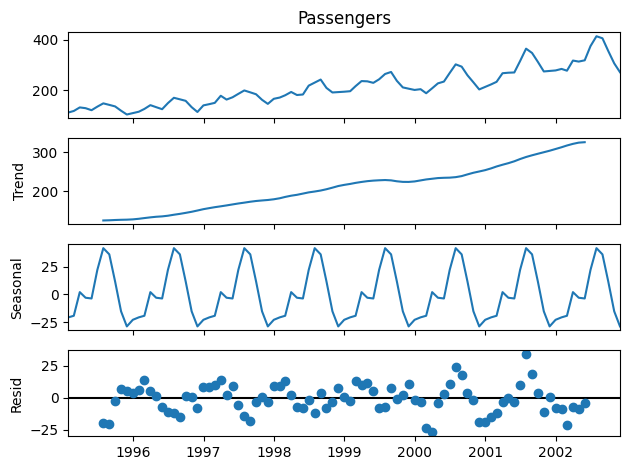

In [69]:
sd=seasonal_decompose(interpolated.Passengers,period=12)
sd.plot()
plt.show()

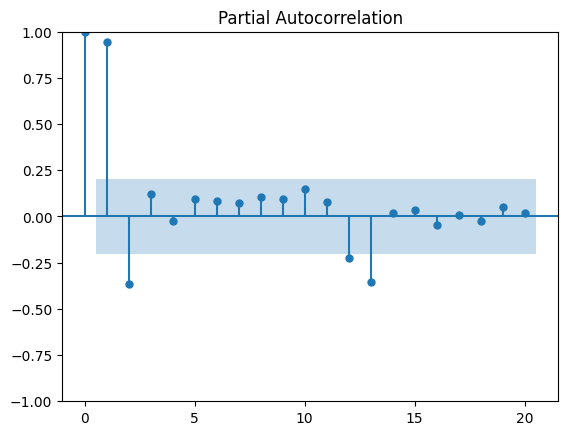

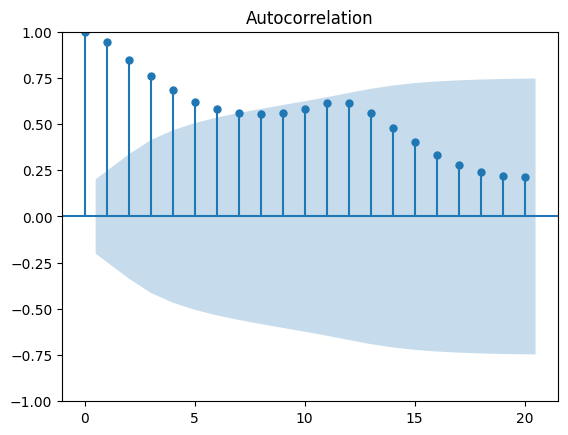

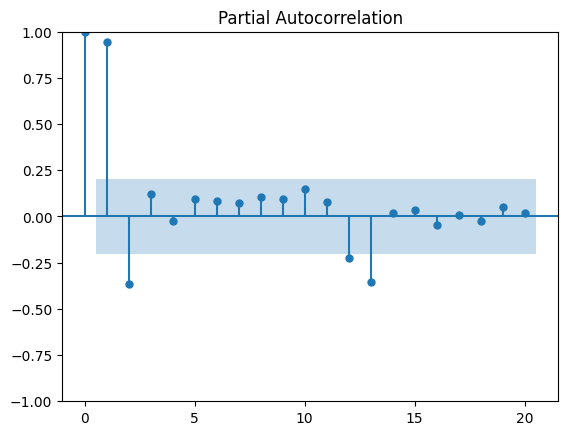

In [71]:
plot_acf(interpolated.Passengers,lags=20)
plot_pacf(interpolated.Passengers,lags=20)

In [73]:
def MAPE(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

In [74]:
ses=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.4)
ses_pred=ses.predict(start=Test.index[0],end=Test.index[-1])
MAPE(ses_pred,Test["Passengers"])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


12.412001656746972

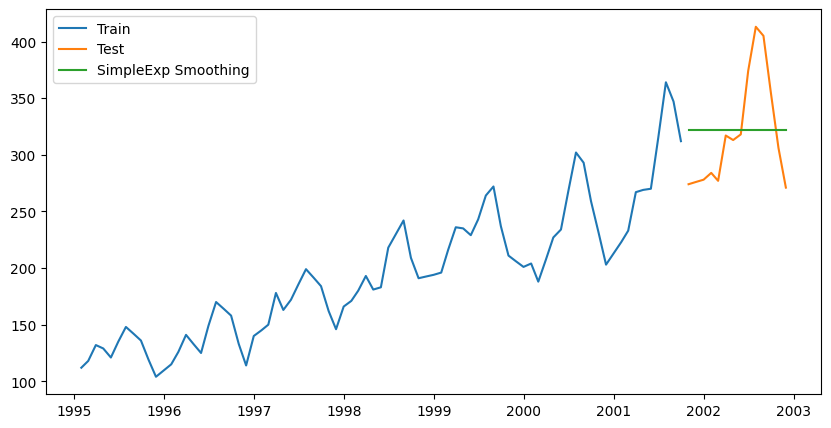

In [75]:
plt.figure(figsize=(10,5))
plt.plot(Train.Passengers,label="Train")
plt.plot(Test.Passengers,label="Test")
plt.plot(ses_pred,label="SimpleExp Smoothing")
plt.legend(loc="best")
plt.show()

In [76]:
holt=Holt(Train.Passengers).fit(smoothing_level=0.4,smoothing_slope=0.2)
holt_pred=holt.predict(start=Test.index[0],end=Test.index[-1])
MAPE(holt_pred,Test.Passengers)

<ipython-input-76-b1b630390ac8>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt=Holt(Train.Passengers).fit(smoothing_level=0.4,smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


34.02218645985186

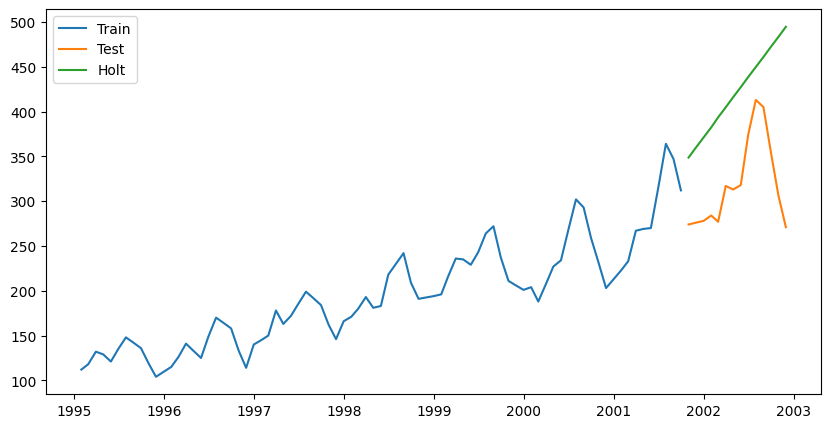

In [77]:
plt.figure(figsize=(10,5))
plt.plot(Train.Passengers,label="Train")
plt.plot(Test.Passengers,label="Test")
plt.plot(holt_pred,label="Holt")
plt.legend(loc="best")
plt.show()

In [78]:
#Additive ExpSmoothing
es_add=ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.4,smoothing_slope=0.2)
es_add_pred=es_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(es_add_pred,Test.Passengers)

<ipython-input-78-802a42fb1233>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  es_add=ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.4,smoothing_slope=0.2)


14.882906559984706

In [79]:
#Additive & Multiplicative ExpSmoothing
es_ma=ExponentialSmoothing(Train.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.4,smoothing_slope=0.2)
es_ma_pred=es_ma.predict(start=Test.index[0],end=Test.index[-1])
MAPE(es_ma_pred,Test.Passengers)

<ipython-input-79-f87d56fbdde4>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  es_ma=ExponentialSmoothing(Train.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.4,smoothing_slope=0.2)


6.444576193625715

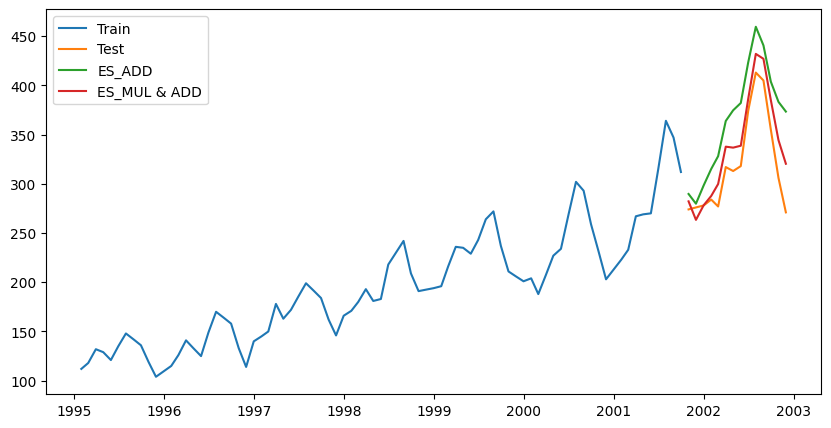

In [80]:
plt.figure(figsize=(10,5))
plt.plot(Train.Passengers,label="Train")
plt.plot(Test.Passengers,label="Test")
plt.plot(es_add_pred,label="ES_ADD")
plt.plot(es_ma_pred,label="ES_MUL & ADD")
plt.legend(loc="best")
plt.show()

In [82]:
rmse_es_ma=np.sqrt(mean_squared_error(es_ma_pred,Test.Passengers))
print("Root Mean Squared Error (RMSE):",rmse_es_ma)

Root Mean Squared Error (RMSE): 23.876263488204074


In [83]:
final=ExponentialSmoothing(Train.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()
final.forecast(10)

2001-10-31    289.335119
2001-11-30    275.751831
2001-12-31    285.418269
2002-01-31    290.501950
2002-02-28    296.930708
2002-03-31    317.431587
2002-04-30    314.931335
2002-05-31    314.502868
2002-06-30    340.146503
2002-07-31    363.503821
Freq: M, dtype: float64

In [84]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [85]:
interpolated.reset_index(inplace=True)

In [86]:
interpolated

,Month,Passengers
0,1995-01-31,112.0
1,1995-02-28,118.0
2,1995-03-31,132.0
3,1995-04-30,129.0
4,1995-05-31,121.0
...,...,...
90,2002-07-31,413.0
91,2002-08-31,405.0
92,2002-09-30,355.0
93,2002-10-31,306.0


In [87]:
interpolated["t"]=1
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [88]:
for i,row in interpolated.iterrows():
  interpolated["t"].iloc[i]=i+1

<ipython-input-88-755d4c9031e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated["t"].iloc[i]=i+1


In [89]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [90]:
interpolated["t_sq"]=(interpolated["t"])**2
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [91]:
interpolated["month"]=interpolated.Month.dt.strftime("%b")
interpolated["year"]=interpolated.Month.dt.strftime("%Y")

In [92]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [94]:
months=pd.get_dummies(interpolated.month)
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
months=months[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]
airlyn=pd.concat([interpolated,months],axis=1)
airlyn.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
airlyn["log_passengers"]=np.log(airlyn["Passengers"])
airlyn.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791


<Axes: xlabel='month', ylabel='year'>

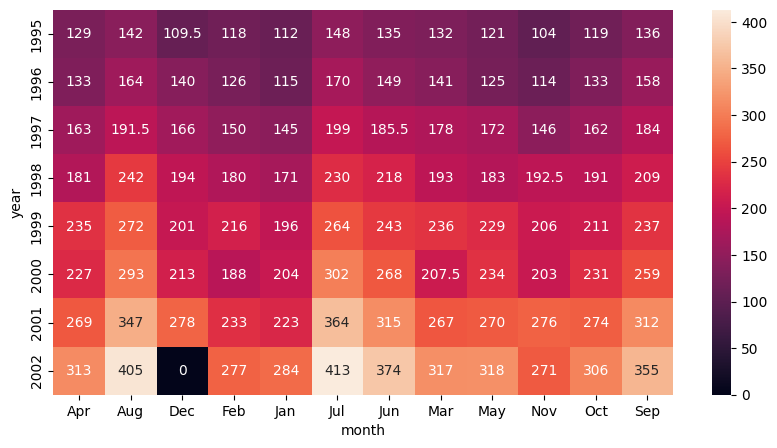

In [100]:
plt.figure(figsize=(10,5))
heatmap=pd.pivot_table(data=airlyn,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

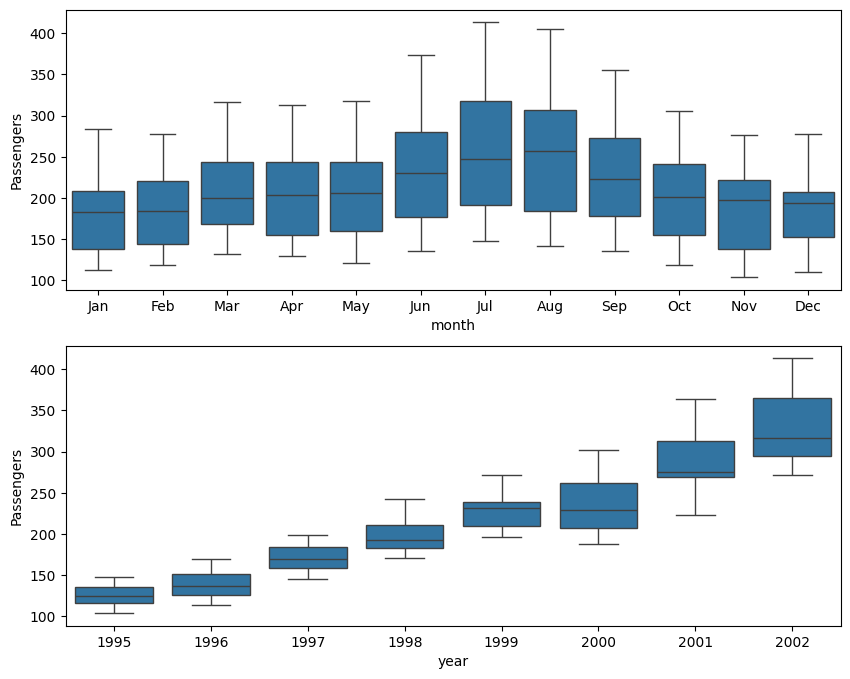

In [104]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlyn)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlyn)
plt.show()

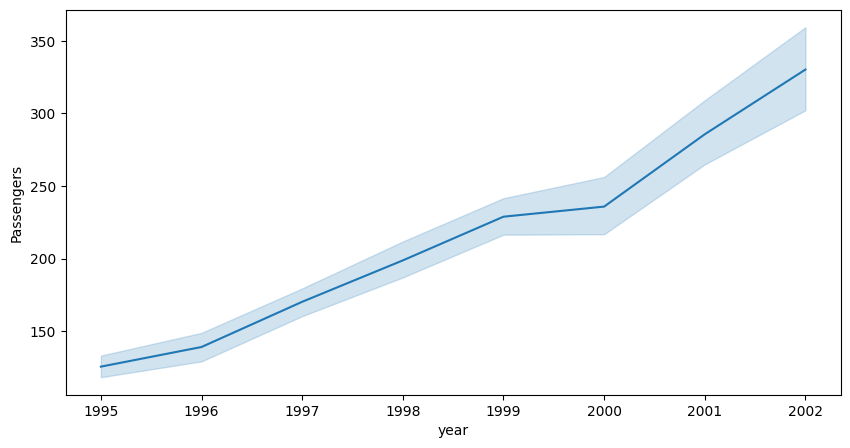

In [106]:
plt.figure(figsize=(10,5))
sns.lineplot(x="year",y="Passengers",data=airlyn)
plt.show()

In [107]:
Train=airlyn.head(81)
Test=airlyn.tail(14)

In [111]:
import statsmodels.formula.api as smf
#Linear Model
linear_model=smf.ols("Passengers~t",data=Train).fit()
linear_model_pred=pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear_model=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(linear_model_pred))**2))
rmse_linear_model

47.87107195088719

In [113]:
#Exponential
exp_model=smf.ols("log_passengers~t",data=Train).fit()
exp_model_pred=pd.Series(exp_model.predict(pd.DataFrame(Test["t"])))
rmse_exp_model=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(exp_model_pred)))**2))
rmse_exp_model

42.37179623821826

In [114]:
#Quadratic
quad=smf.ols("Passengers~t+t_sq",data=airlyn).fit()
quad_pred=pd.Series(quad.predict(Test[["t","t_sq"]]))
rmse_quad=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(quad_pred))**2))
rmse_quad

42.523434739990485

In [117]:
#Additive Seasonality
additive=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=airlyn).fit()
additive_pred=pd.Series(additive.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]))
rmse_additive=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(additive_pred))**2))
rmse_additive

110.80922271454848

In [121]:
#Additive Quadratic Seasonality
additive_quad=smf.ols("Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=airlyn).fit()
additive_quad_pred=pd.Series(additive_quad.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","t","t_sq"]]))
rmse_additive_quad=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(additive_quad_pred))**2))
rmse_additive_quad

19.670826735884337

In [122]:
#Multiplicative Seasonality
multiplicative=smf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=airlyn).fit()
multiplicative_pred=pd.Series(multiplicative.predict(Test))
rmse_multiplicative=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(multiplicative_pred)))**2))
rmse_multiplicative

121.0071130429699

In [123]:
#Multiplicative Additive Seasonality
ma=smf.ols("log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=airlyn).fit()
ma_pred=pd.Series(ma.predict(Test))
rmse_ma=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(ma_pred)))**2))
rmse_ma

11.632634692447393

In [125]:
data={"Model":pd.Series(["rmse_linear_model","rmse_exp_model","rmse_quad","rmse_additive","rmse_additive_quad","rmse_multiplicative","rmse_ma"]),"RMSE values":pd.Series([rmse_linear_model,rmse_exp_model,rmse_quad,rmse_additive,rmse_additive_quad,rmse_multiplicative,rmse_ma])}
rmse_value_table=pd.DataFrame(data)
rmse_value_table.sort_values("RMSE values")

,Model,RMSE values
6,rmse_ma,11.632635
4,rmse_additive_quad,19.670827
1,rmse_exp_model,42.371796
2,rmse_quad,42.523435
0,rmse_linear_model,47.871072
3,rmse_additive,110.809223
5,rmse_multiplicative,121.007113


**Inference: By the analysis above, we can conclude that "rmse_ma" may be preferred to others.**